# Girls Who Code Workshop: Exploring Datasets and Algorithms


### Jupyter Notebook setup
Matplotlib is a python library for plotting 2D figures.
<br>
Jupyter notebooks use "cell magic" to enable matplotlib figures to show up inline

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import csv

## Basic Python

Python is a fully fledged professional programming language. Used across a wide number of sectors:

- Commercial products like Dropbox, Instagram and others;
- Research areas like machine learning, astrophysics and others.

We will go over some of the very basics here which if you have never used Python before will be enough to get you started.

### Variables

We can assign values to variables for future use:

In [1]:
# Anything after a `#` will be ignored. This is what we call a 'comment'
a = 2.0  # Assigning a value to a
b = 4.0  # Assigning a value to b
a * b  # Calculating the product of a and b

8.0

In [3]:
a / b  # Calculating a / (a + b)

0.5

In [18]:
a ** b  # Calculating a raised to the power of b

16.0

### Lists and Arrays 
You can create lists of things in Python (often also called arrays in other programming languages)

In [4]:
listOfFoods = ["Pizza", "Ice Cream", "Chocolate", "Macaroni and Cheese"]
listOfNumbers = [1, 3, 5, 6, 1004, 345, 3]

Once you have lists, you can index into them to grab certain elements. You can even use them inside functions, which we'll discuss below.

Note: Python indices start from 0 (as do most other programming langauges!)

In [8]:
listOfFoods[2] #Index 2 here technically means the third element!

'Chocolate'

### Functions

Similar to variables we can create functions that can be easily reused.

In [21]:
def addTwo(num):
    num = num + 2
    return num

In [22]:
addTwo(2)

4

### Repeating things with for loops

We can use a `for` loop to repeat bits of code with Python. For example the following will calculate:

$$\sum_{i=0}^9i$$

$$1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 = 45$$

In [11]:
def sumUpToNine():
    total = 0
    for i in range(10): # range(10) will create a list for us that looks like this: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
        total = total + i
    return total

In [27]:
sumUpToNine()

45

There are a couple of things happening there:

1. We're creating a variable `total` and assining it to have value `0`.
2. We are using `range(10)` which is a Python function to get a generator of numbers from `0` (inclusive) to `10` (exclusive).
3. The `for loop` simply repeats all the block of code that is indented.
4. The code that is repeated is `total = total + i` so we are incrementally adding `i` to `total`.


### If-else statements
Use control logic to specify different outcomes based on given specifications

In [31]:
def getFavoriteSport(sport):
    if sport == "Football":
        print "My favorite sport is football!"
    elif sport == "Soccer":
        print "My favorite sport is soccer!"
    elif sport == "Baseball":
        print "My favorite sport is baseball!"
    else:
        print "I have some other favorite sport!"

In [32]:
getFavoriteSport("swimming")

I have some other favorite sport!


## Playing with Datasets
What can we do now that we know some python? Let's try applying our knowledge to exploring some datasets. 

### Load a CSV Dataset #1: WCBB Tournament Dataset
Included in this repository is an excel spreadsheet containing analytics projections for the Women’s College Basketball (WCBB) tournament as of 3/14/2018. We can read this data in as a CSV and parse each column as a list.

This is done for you below:

In [153]:
with open('WCBB Tournament Data Set.csv', 'rb') as csvfile:
    data = csv.DictReader(csvfile)
    teamNames = []
    chanceWinTitle = []
    chanceMakeFinal = []
    for row in data:
        teamNames.append(row['TEAM_NAME'])
        chanceWinTitle.append(row['CHANCE_WIN_TITLE'])
        chanceMakeFinal.append(row['CHANCE_MAKE_FINAL'])
chanceWinTitle = list(map(float, chanceWinTitle))
chanceMakeFinal= list(map(float, chanceMakeFinal))

### WCBB Tournament Dataset CODING EXERCISE: How many teams are there in our data?
How can we tell how many teams we're considering in our data? One way is to use a built in python function: len(), which will give us the count of the number of items in a list.

In [134]:
len(teamNames)

64

Now, try writing a function to do the same thing without using this len() function!

In [135]:
def countNumberOfTeams(listOfTeams):
    count = 0
    for team in listOfTeams:
        count = count + 1
    return count

In [136]:
countNumberOfTeams(teamNames) # Should also return 64 teams!

64

### More complex example: Find the most and least popular teams (HANDOUT EXERCISE)

a) Team with the highest chance of winning the entire tournament (highest chance to win title)

In [145]:
def findHighestWinningChanceTeam():
    maxChance = max(chanceWinTitle)
    indexOfMaxChance = chanceWinTitle.index(maxChance)
    winningTeam = teamNames[indexOfMaxChance]
    return winningTeam

print findHighestWinningChanceTeam()

UConn


### Load a CSV Dataset #2: Women's Tennis Grand Slam Titles
Included in this repository is an excel spreadsheet containing analytics projections for the Women’s Tennis Grand Slam Tournament as of 4/18/2018. We can read this data in as a CSV and parse each column as a list.

This is done for you below:

In [166]:
with open('WTennis Grand Slam Titles Data Set.csv', 'rb') as csvfile:
    data = csv.DictReader(csvfile)
    year = []
    tournament = []
    winner = []
    runnerUp = []
    for row in data:
        year.append(row['YEAR'])
        tournament.append(row['TOURNAMENT'])
        winner.append(row['WINNER'])
        runnerUp.append(row['RUNNER-UP'])

### Women's Tennis Grand Slam Title Dataset CODING EXERCISE: Who has won the most tournaments?
How can we write an algorithm to find who won the most tournaments in history?


In [29]:
def getPlayerCounts():
    playerCounts = {}
    for athlete in winner:
        if athlete not in playerCounts:
            playerCounts[athlete] = 1
        else:
            playerCounts[athlete] += 1
    return playerCounts

In [30]:
def getTopWinner(dictionary):
    return max(dictionary, key=dictionary.get)

In [31]:
athleteWins = getPlayerCounts()
print getTopWinner(athleteWins)

Serena Williams


### Plot pretty graphs!
You can create a ton of visualizations of your data and specify customizations like color, titles, scale, etc. 

### Graph Example 1:
Plot Chance to Win Title for each team as a bar chart

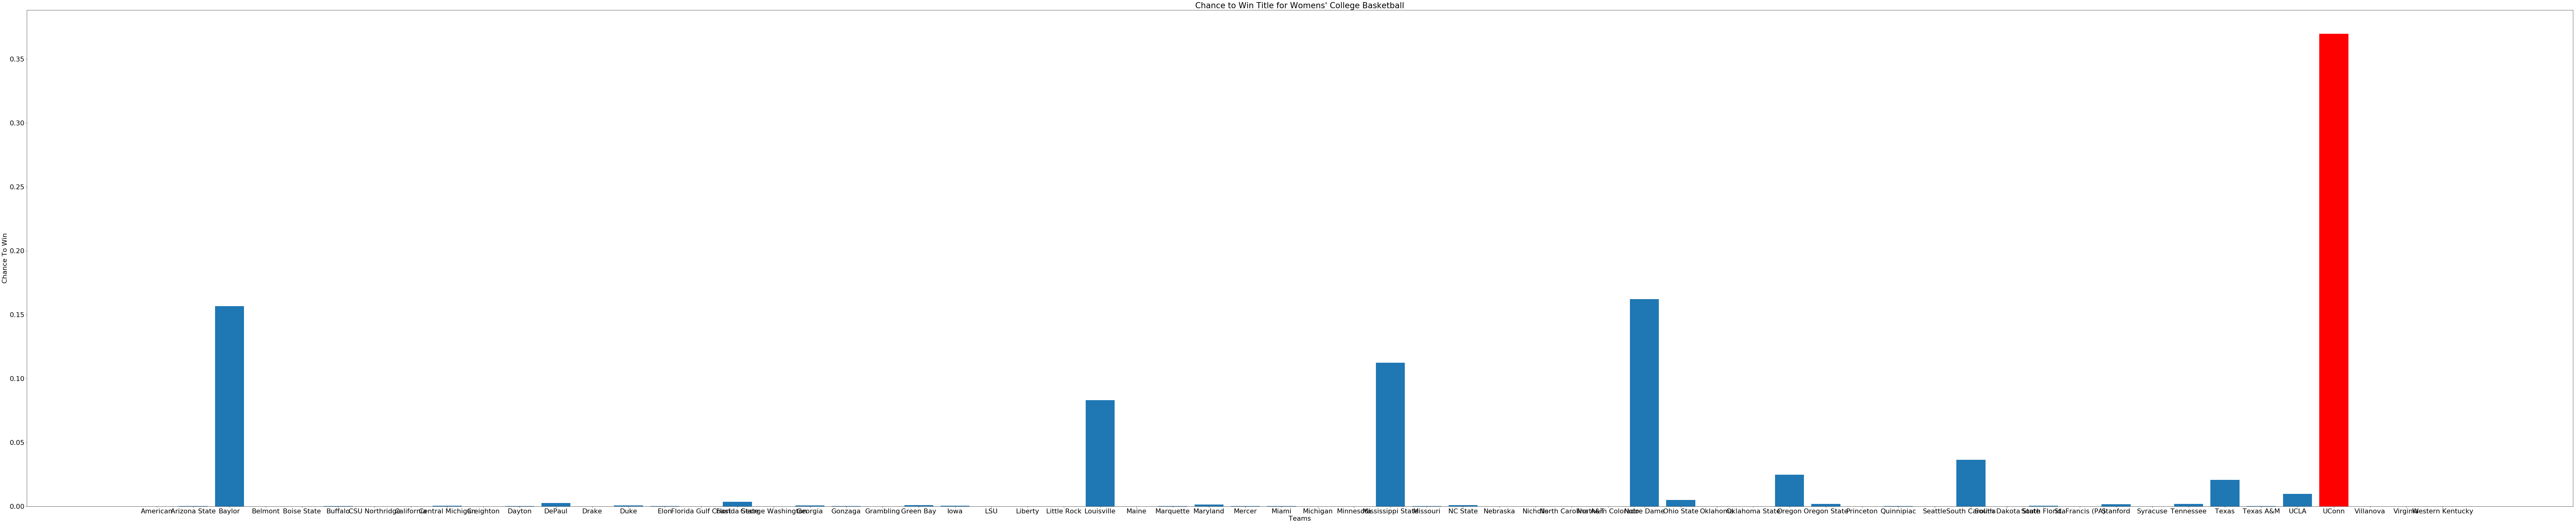

In [154]:
barchart = plt.bar(teamNames, chanceWinTitle);
barchart[0].set_color('r') # re-colors the max bar, which we know is at index 0 to red color
plt.title("Chance to Win Title for Womens' College Basketball")
plt.xlabel("Teams")
plt.ylabel("Chance To Win")

matplotlib.rcParams['figure.figsize'] = [150, 30]

### Graph Example 2:
Plot distribution of chances to win and add color values 

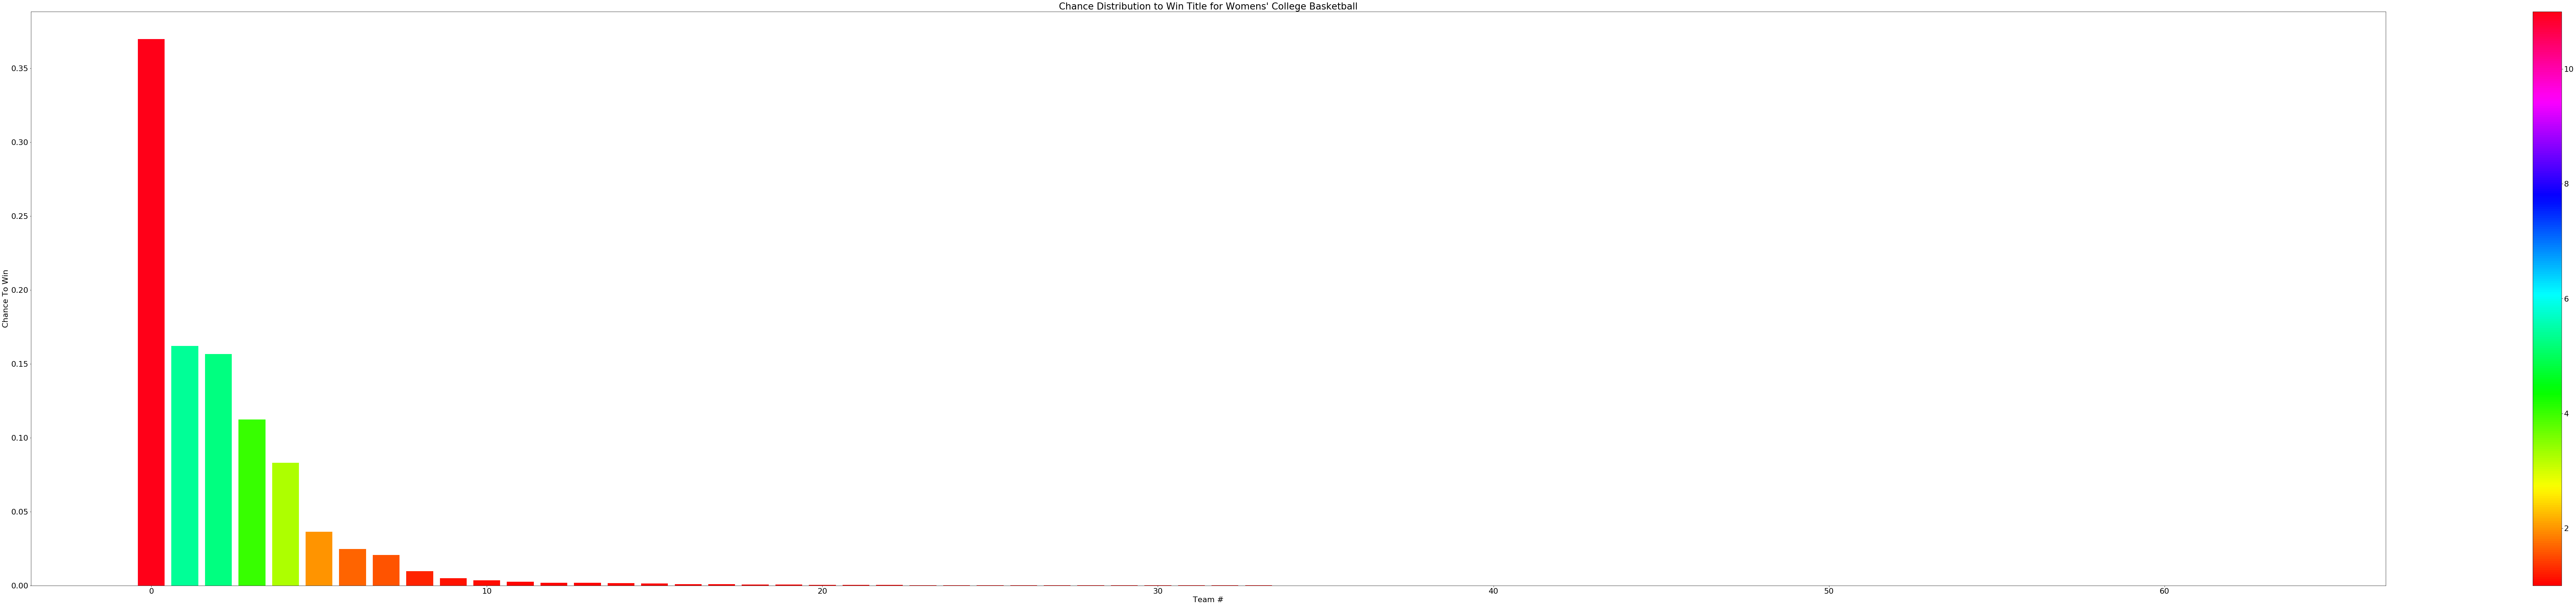

In [160]:
chanceWinTitleNums = list(map(float, chanceWinTitle))
y = np.array(chanceWinTitleNums)
colors = cm.hsv(y / float(max(y)))
plt.clf()
plt.colorbar(plot)
plt.bar(range(len(y)), y, color = colors)
plt.title("Chance Distribution to Win Title for Womens' College Basketball")
plt.xlabel("Team #")
plt.ylabel("Chance To Win")
plt.show()

### Graph Example 3: Number of titles Serena Williams has won over the years

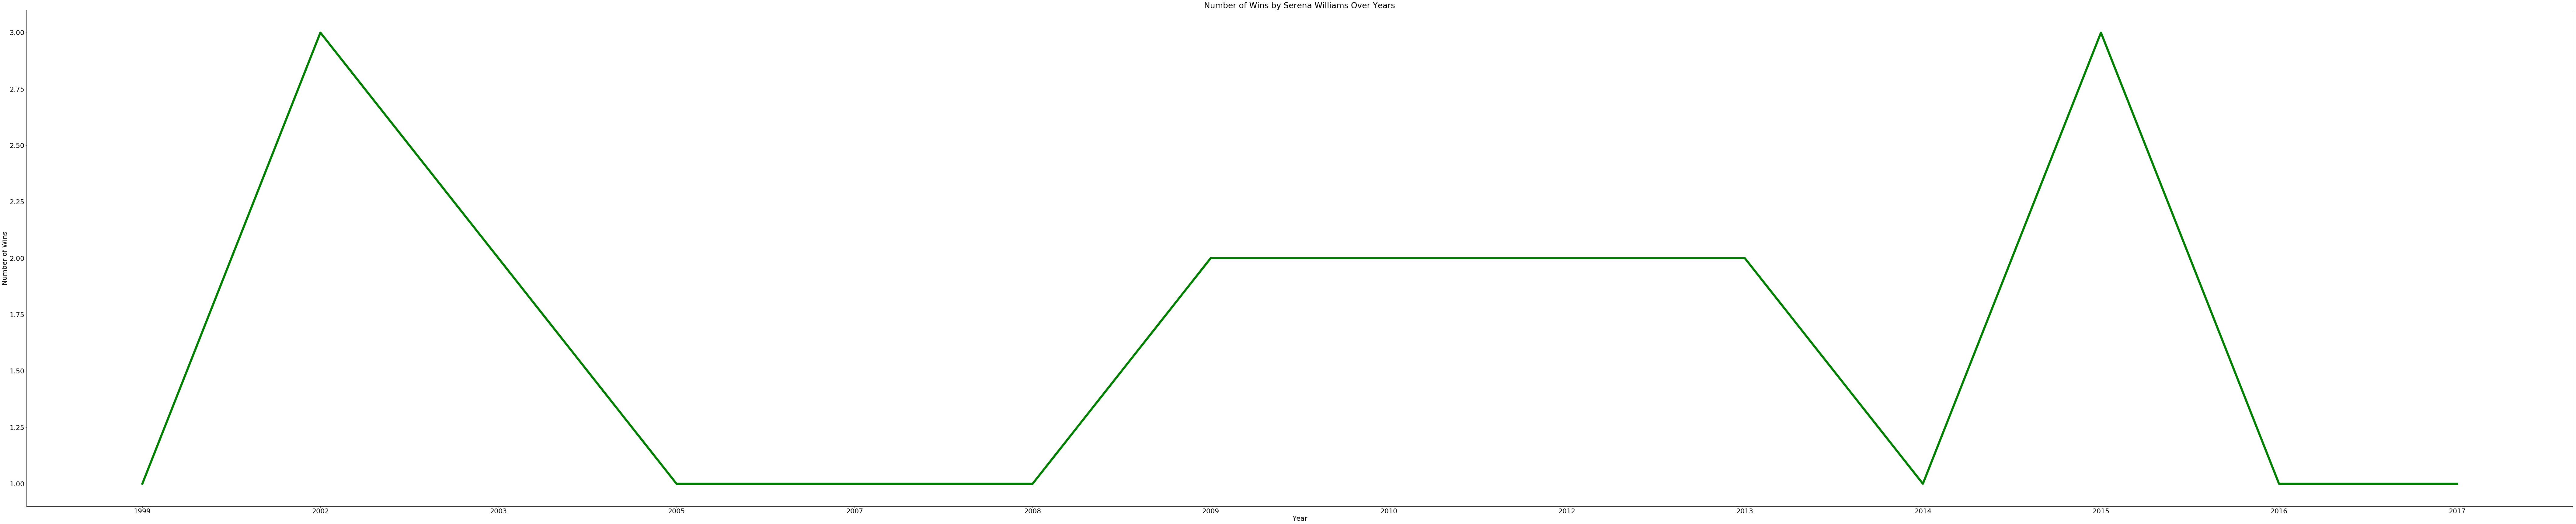

In [178]:
zipYearWinner = zip(year, winner)
# print zipYearWinner
serenaWins = {}
for z in zipYearWinner:
    if z[1] == 'Serena Williams':
        if z[0] in serenaWins:
            serenaWins[z[0]] += 1
        else:
            serenaWins[z[0]] = 1
lists = sorted(serenaWins.items()) # sorted by key, return a list of tuples
x, y = zip(*lists)
plt.plot(x, y, color = 'green', linewidth=7.0)
plt.title("Number of Wins by Serena Williams Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Wins")
plt.show()
